In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df= pd.read_csv("bikes_mod.csv")
sns.set(rc={'figure.figsize':[10,6]},font_scale=1.2)

In [4]:
df["Month"]= df["datetime"].apply(lambda r:r.split("-")[1])
df["Year"]= df["datetime"].apply(lambda r:r.split("-")[0])

In [5]:
df.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit,Month,Year
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,107.328767,01,2011
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0,8,32,40,275.028767,01,2011
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0,5,27,32,201.928767,01,2011
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0,3,10,13,94.428767,01,2011
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,4.128767,01,2011


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            10886 non-null  object 
 1   season              10672 non-null  object 
 2   holiday             10030 non-null  float64
 3   workingday          9388 non-null   float64
 4   weather             8746 non-null   object 
 5   temp                8104 non-null   float64
 6   humidity            7462 non-null   float64
 7   windspeed           6820 non-null   float64
 8   casual              10886 non-null  int64  
 9   registered          10886 non-null  int64  
 10  rented_bikes_count  10886 non-null  int64  
 11  Profit              10886 non-null  float64
 12  Month               10886 non-null  object 
 13  Year                10886 non-null  object 
dtypes: float64(6), int64(3), object(5)
memory usage: 1.2+ MB


In [10]:
df.describe()

,holiday,workingday,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit
count,10030.000000,9388.000000,8104.000000,7462.000000,6820.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.029113,0.678206,20.317665,61.790673,12.708806,36.021955,155.552177,191.574132,1288.280751
std,0.168131,0.467189,7.818568,19.262084,8.131154,49.960477,151.039033,181.144454,1309.683400
min,0.000000,0.000000,0.820000,0.000000,0.000000,0.000000,0.000000,1.000000,4.128767
25%,0.000000,0.000000,13.940000,47.000000,7.001500,4.000000,36.000000,42.000000,253.528767
50%,0.000000,1.000000,20.500000,62.000000,12.998000,17.000000,118.000000,145.000000,889.928767
75%,0.000000,1.000000,26.240000,77.000000,16.997900,49.000000,222.000000,284.000000,1891.828767
max,1.000000,1.000000,41.000000,100.000000,56.996900,367.000000,886.000000,977.000000,7881.728767


what is the best month in profit and the best month in rented bikes count ?

<AxesSubplot:xlabel='Month', ylabel='Profit'>

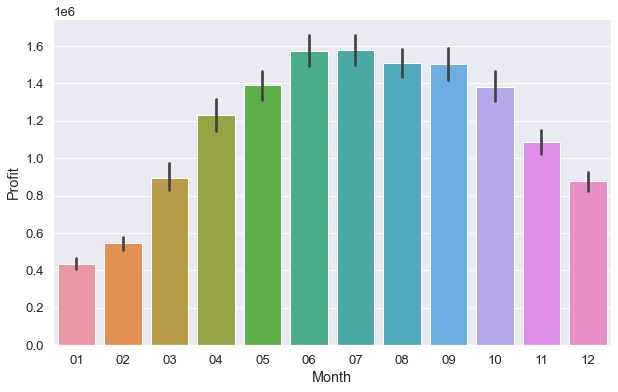

In [5]:
sns.barplot(data=df, x="Month", y="Profit" ,estimator=sum )

<AxesSubplot:xlabel='Month', ylabel='rented_bikes_count'>

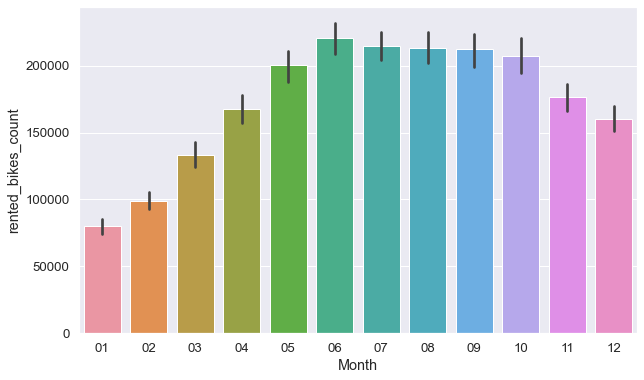

In [6]:
sns.barplot(data=df, x="Month", y="rented_bikes_count" ,estimator=sum )

# why Jun and Jul is the best 2 months in profit rented bikes count ?

<AxesSubplot:xlabel='Month', ylabel='count'>

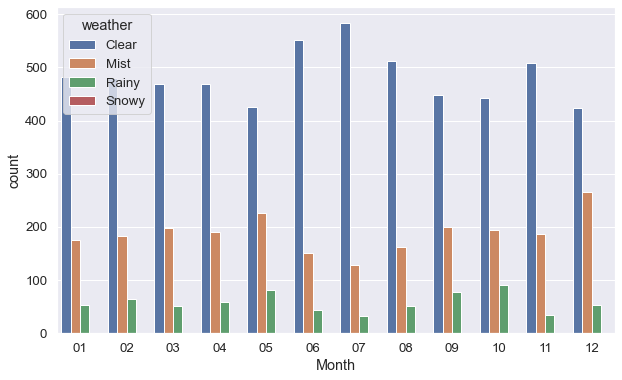

In [7]:
sns.countplot(data=df , x="Month", hue= "weather")

<AxesSubplot:xlabel='weather', ylabel='Profit'>

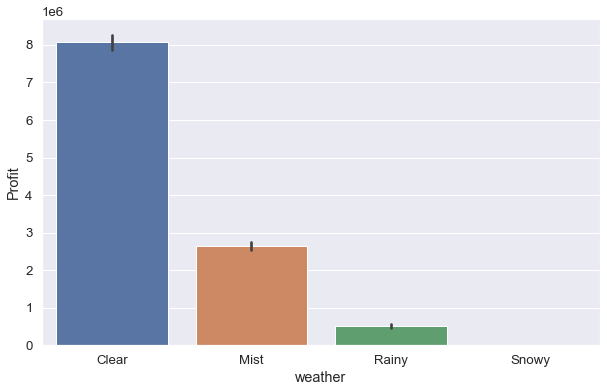

In [8]:
df.groupby('weather').sum()['Profit'].sort_values(ascending=False)
indexw = df.groupby('weather').sum()['Profit'].sort_values(ascending=False).index
sns.barplot(data=df,x='weather',y='Profit', estimator=sum ,order=indexw)

<AxesSubplot:xlabel='Month', ylabel='humidity'>

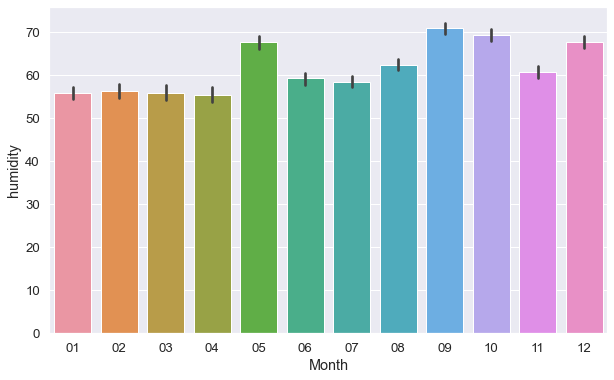

In [9]:
sns.barplot(data=df, x="Month", y="humidity")

<AxesSubplot:xlabel='Month', ylabel='temp'>

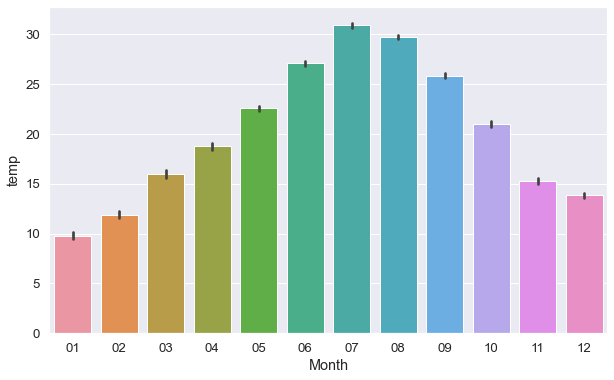

In [10]:
sns.barplot(data=df, x="Month", y="temp")

<AxesSubplot:xlabel='temp', ylabel='Profit'>

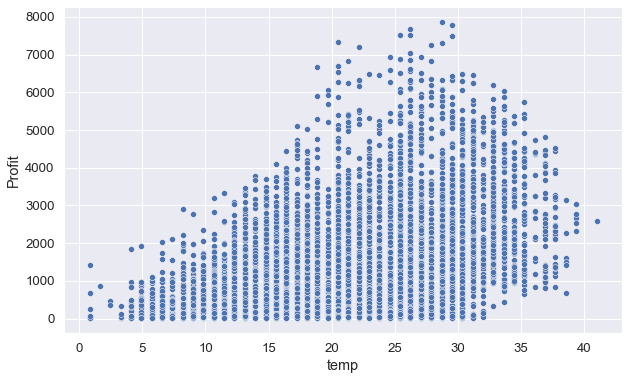

In [11]:
sns.scatterplot(data=df, x="temp", y="Profit")

<AxesSubplot:xlabel='Month', ylabel='windspeed'>

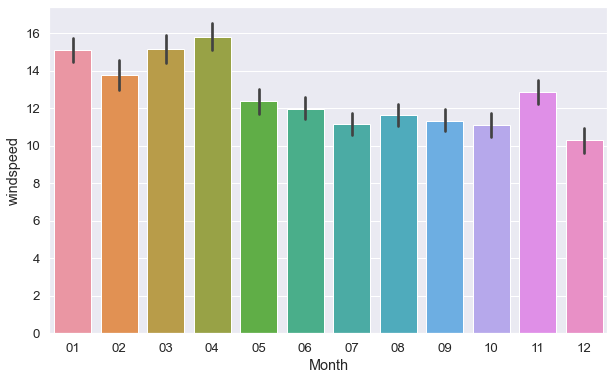

In [12]:
sns.barplot(data=df, x="Month", y="windspeed")

<AxesSubplot:xlabel='windspeed', ylabel='Profit'>

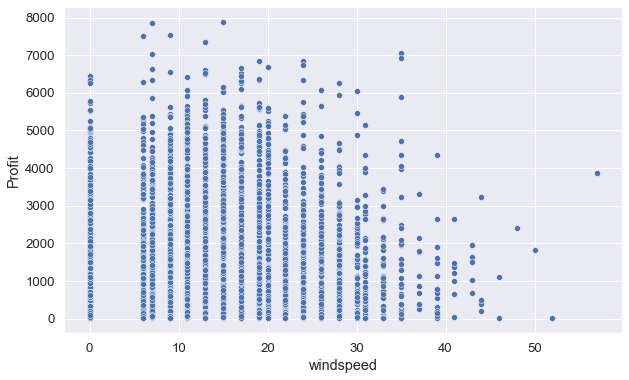

In [13]:
sns.scatterplot(data=df, x="windspeed", y="Profit")

<AxesSubplot:xlabel='Month', ylabel='holiday'>

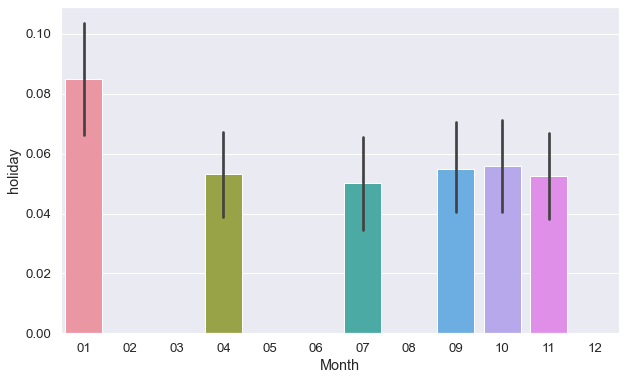

In [14]:
sns.barplot(data=df, x="Month", y="holiday")

<AxesSubplot:xlabel='Month', ylabel='workingday'>

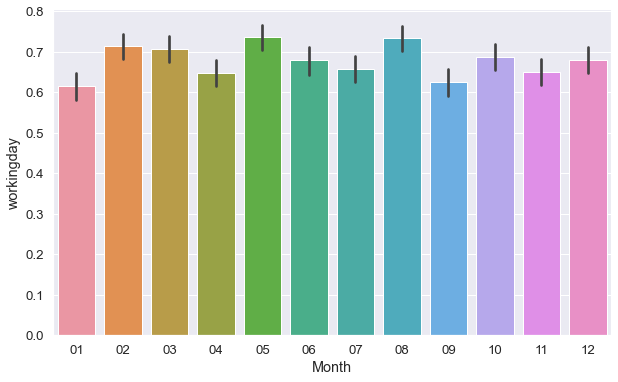

In [15]:
sns.barplot(data=df, x="Month", y="workingday")

<AxesSubplot:xlabel='season', ylabel='Profit'>

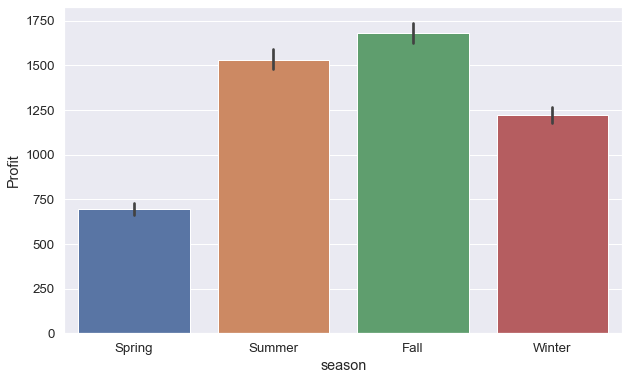

In [16]:
sns.barplot(data=df, x="season", y="Profit")

As we can see there are two figurs that have strong empact on count of rented bikes (weather & Temp )
and aslo there is empact on profit by the high dgrees of wind speed

# what is the best year profit and why?

In [20]:
df.groupby('Year').sum()['Profit'].sort_values(ascending=False)

Year
2012    8.652604e+06
2011    5.371621e+06
Name: Profit, dtype: float64

<AxesSubplot:xlabel='Year', ylabel='Profit'>

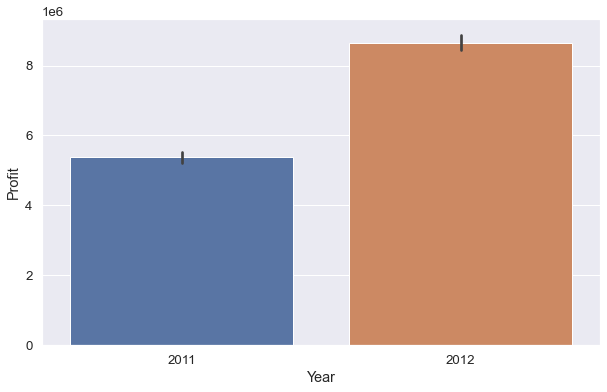

In [21]:
sns.barplot(data=df,x='Year',y='Profit',estimator=sum)

<AxesSubplot:xlabel='Year', ylabel='Profit'>

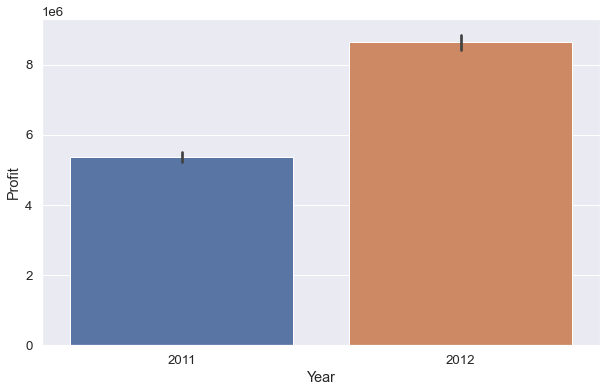

In [44]:
sns.barplot(data=df, x="Year", y="Profit", estimator=sum)

<AxesSubplot:xlabel='Year', ylabel='rented_bikes_count'>

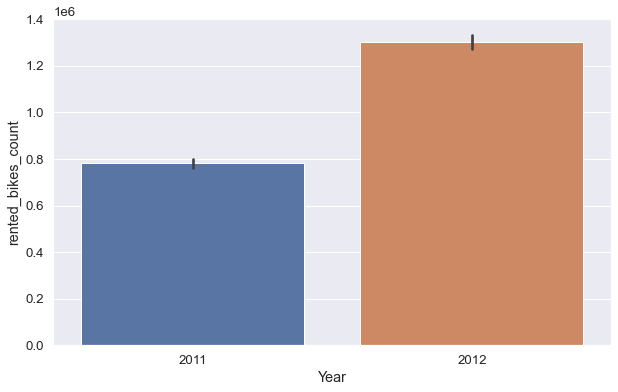

In [25]:
sns.barplot(data=df, x="Year", y="rented_bikes_count" ,estimator=sum )

<AxesSubplot:xlabel='Year', ylabel='registered'>

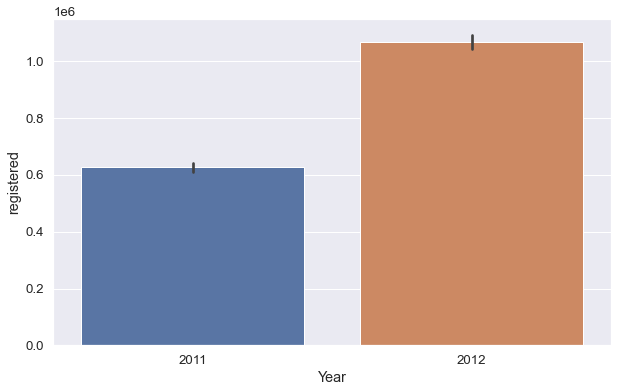

In [43]:
sns.barplot(data=df , x="Year", y= "registered", estimator=sum)

best year is 2012
In 2012 the profit increased because of an increase in the number of registered users and repeated Customers, also I advise promoting the customers to make registrations.

<AxesSubplot:xlabel='holiday', ylabel='rented_bikes_count'>

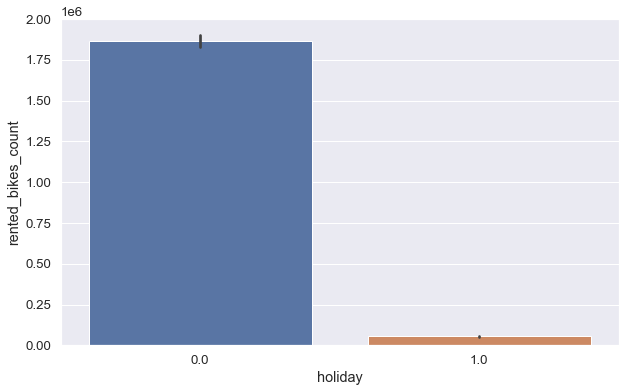

In [50]:
sns.barplot(data=df,x='holiday',y='rented_bikes_count',estimator=sum)

<AxesSubplot:xlabel='workingday', ylabel='rented_bikes_count'>

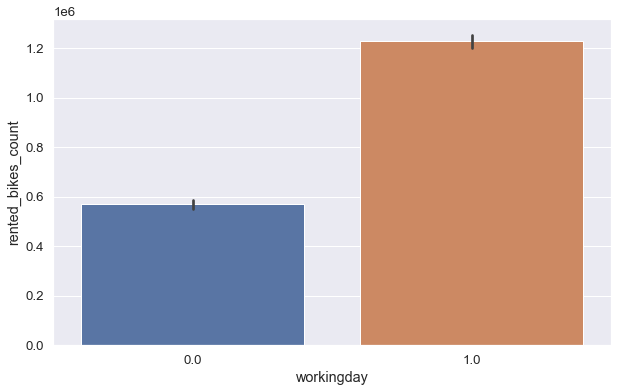

In [49]:
sns.barplot(data=df,x='workingday',y='rented_bikes_count',estimator=sum)

as we see the customers use bikes more on working days, and that tells us why the customer uses the bike periodically, and the company has to make using the bike funnier to attract more customers on holidays.